# Starting notebook SEN124A Project - Mississippi

You can use this notebook as a start for your network analysis with python/networkx

In [210]:
# You might need to install a library that is missing. 
# For example, if networkx is not installed you can install it by running

!pip install networkx

# You only need to do this once

In [211]:
# Import Libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [212]:
# Read in the excel file 'mississippi.xlsx' as a dataframe
mississippi_network = pd.read_excel('mississippi.xlsx')
# Show contents of the dataframe
mississippi_network

,weight,0,b
0,1,Washington,Oregon
1,1,Washington,California
2,1,California,Oregon
3,1,California,Nevada
4,1,California,Arizona
5,1,California,Texas
6,1,California,Indiana
7,1,Arizona,Texas
8,1,Texas,Louisiana
9,1,Texas,Florida


In [213]:
mississippi_network

,weight,0,b
0,1,Washington,Oregon
1,1,Washington,California
2,1,California,Oregon
3,1,California,Nevada
4,1,California,Arizona
5,1,California,Texas
6,1,California,Indiana
7,1,Arizona,Texas
8,1,Texas,Louisiana
9,1,Texas,Florida


In [214]:
# Read in the excel file 'mississippi.xlsx' as a dataframe
mississippi_network = pd.read_excel('distance_state.xlsx')
# Show contents of the dataframe
mississippi_network

,weight,0,b,Distance
0,1,Washington,Oregon,160
1,1,Washington,California,693
2,1,California,Oregon,536
3,1,California,Nevada,130
4,1,California,Arizona,755
5,1,California,Texas,1760
6,1,California,Indiana,2194
7,1,Arizona,Texas,1009
8,1,Texas,Louisiana,432
9,1,Texas,Florida,873


In [215]:
# Make a graph from the dataframe
Mississippi_Graph=nx.from_pandas_edgelist(mississippi_network, 0, 'b','Distance')

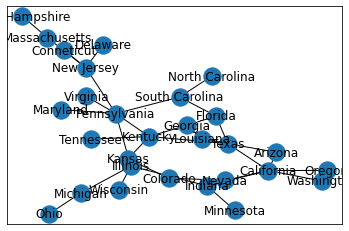

In [216]:
# Plot the graph
nx.draw_networkx(Mississippi_Graph, with_labels = True)

In [217]:
#create a new node attribute "warehouse size"
whs = []
nx.set_node_attributes(Mississippi_Graph, whs, "warehouse size")

#Set the data per new node for the attribute "warehouse size"
Mississippi_Graph.nodes["Arizona"]["warehouse size"] = 3210500
Mississippi_Graph.nodes["California"]["warehouse size"] = 14123800
Mississippi_Graph.nodes["Colorado"]["warehouse size"] = 1000000
Mississippi_Graph.nodes["Conneticut"]["warehouse size"] = 14123800
Mississippi_Graph.nodes["Delaware"]["warehouse size"] = 1000200
Mississippi_Graph.nodes["Florida"]["warehouse size"] = 4890000
Mississippi_Graph.nodes["Georgia"]["warehouse size"] = 1385000
Mississippi_Graph.nodes["Indiana"]["warehouse size"] = 5450000
Mississippi_Graph.nodes["Illinois"]["warehouse size"] = 6012000
Mississippi_Graph.nodes["Kansas"]["warehouse size"] = 2120000
Mississippi_Graph.nodes["Kentucky"]["warehouse size"] = 5145000
Mississippi_Graph.nodes["Maryland"]["warehouse size"] = 2300000
Mississippi_Graph.nodes["Massachusetts"]["warehouse size"] = 1000000
Mississippi_Graph.nodes["Michigan"]["warehouse size"] = 1000000
Mississippi_Graph.nodes["Minnesota"]["warehouse size"] = 820000
Mississippi_Graph.nodes["Nevada"]["warehouse size"] = 2150000
Mississippi_Graph.nodes["New Hampshire"]["warehouse size"] = 63800
Mississippi_Graph.nodes["New Jersey"]["warehouse size"] = 2260000
Mississippi_Graph.nodes["North Carolina"]["warehouse size"] = 397800
Mississippi_Graph.nodes["Ohio"]["warehouse size"] = 1855000
Mississippi_Graph.nodes["Oregon"]["warehouse size"] = 855000
Mississippi_Graph.nodes["Pennsylvania"]["warehouse size"] = 8350000
Mississippi_Graph.nodes["South Carolina"]["warehouse size"] = 2340000
Mississippi_Graph.nodes["Tennessee"]["warehouse size"] = 3680000
Mississippi_Graph.nodes["Texas"]["warehouse size"] = 8834000
Mississippi_Graph.nodes["Virginia"]["warehouse size"] = 2300000
Mississippi_Graph.nodes["Washington"]["warehouse size"] = 2280000
Mississippi_Graph.nodes["Wisconsin"]["warehouse size"] = 1100000
Mississippi_Graph.nodes["Louisiana"]["warehouse size"] = 50000000

In [218]:
# Print the node names
Mississippi_Graph.nodes

NodeView(('Washington', 'Oregon', 'California', 'Nevada', 'Arizona', 'Texas', 'Indiana', 'Louisiana', 'Florida', 'Kentucky', 'Tennessee', 'Georgia', 'South Carolina', 'Kansas', 'Pennsylvania', 'North Carolina', 'Maryland', 'Virginia', 'New Jersey', 'Conneticut', 'Delaware', 'Massachusetts', 'New Hampshire', 'Colorado', 'Minnesota', 'Illinois', 'Wisconsin', 'Michigan', 'Ohio'))

In [219]:
b = pd.DataFrame.from_dict(dict(Mississippi_Graph.nodes(data=True)), orient='index')

In [220]:
# Return the warehouse size for state Arizona
Mississippi_Graph.nodes["Arizona"]["warehouse size"]

3210500

More information about Graph operations can be found in the NetworkX documentation:
https://networkx.github.io/documentation/stable/index.html

For example, this is the documentation on calculating the edge betweenness centrality:
https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.edge_betweenness_centrality.html#networkx.algorithms.centrality.edge_betweenness_centrality

In [221]:
c = list(Mississippi_Graph.nodes)

In [267]:
df = pd.DataFrame(columns=['State','Closeness_centrality'])
for i in c:
    a = nx.closeness_centrality(Mississippi_Graph,i,'Distance')
    new_row = {'State': i, 'Closeness_centrality': a}
    df = df.append(new_row, ignore_index=True)

In [268]:
df.sort_values(by=['Closeness_centrality'], ascending=False)

,State,Closeness_centrality
14,Pennsylvania,0.000814
9,Kentucky,0.000774
18,New Jersey,0.000760
16,Maryland,0.000748
20,Delaware,0.000703
17,Virginia,0.000694
19,Conneticut,0.000672
10,Tennessee,0.000669
12,South Carolina,0.000669
25,Illinois,0.000665
